In [83]:
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# this website had the hsitorical inflation rate in table form

inf_url = "https://www.rateinflation.com/inflation-rate/australia-historical-inflation-rate/"

In [4]:
# I use the read_html method to grab the table data from the website

inflation_df = pd.read_html(inf_url)
inflation_df

[    Year    mar    jun    sep    dec  Annual
 0   2022   5.1%   6.1%    NaN    NaN     NaN
 1   2021   1.1%   3.8%   3.0%   3.5%    2.9%
 2   2020   2.2%  -0.3%   0.7%   0.9%    0.8%
 3   2019   1.3%   1.6%   1.7%   1.8%    1.6%
 4   2018   1.9%   2.1%   1.9%   1.8%    1.9%
 ..   ...    ...    ...    ...    ...     ...
 69  1953   6.8%   4.9%   4.8%   1.6%    4.5%
 70  1952  22.9%  19.6%  17.0%  10.5%   17.2%
 71  1951  14.3%  18.6%  20.5%  23.9%   19.4%
 72  1950   7.7%   7.5%   7.3%  12.2%    8.7%
 73  1949     ∞%     ∞%  10.8%   7.9%  114.7%
 
 [74 rows x 6 columns]]

In [5]:
# I take the object returned and save it as a dataframe

inflation_df = inflation_df[0]
inflation_df

,Year,mar,jun,sep,dec,Annual
0,2022,5.1%,6.1%,NaN,NaN,NaN
1,2021,1.1%,3.8%,3.0%,3.5%,2.9%
2,2020,2.2%,-0.3%,0.7%,0.9%,0.8%
3,2019,1.3%,1.6%,1.7%,1.8%,1.6%
4,2018,1.9%,2.1%,1.9%,1.8%,1.9%
...,...,...,...,...,...,...
69,1953,6.8%,4.9%,4.8%,1.6%,4.5%
70,1952,22.9%,19.6%,17.0%,10.5%,17.2%
71,1951,14.3%,18.6%,20.5%,23.9%,19.4%
72,1950,7.7%,7.5%,7.3%,12.2%,8.7%


In [6]:
# I set the index for the inflation data as "Year"

inflation_df = inflation_df.set_index("Year")
inflation_df.index

Int64Index([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
            2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
            2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990,
            1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979,
            1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968,
            1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957,
            1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949],
           dtype='int64', name='Year')

In [7]:
# I pulled out only the annual inflation rate
# I also clean this column by removing the '%' and convert to a float

inflation_df["Annual"] = inflation_df["Annual"].str.replace("%", "").astype(float)
inflation_df["Annual"]

Year
2022      NaN
2021      2.9
2020      0.8
2019      1.6
2018      1.9
        ...  
1953      4.5
1952     17.2
1951     19.4
1950      8.7
1949    114.7
Name: Annual, Length: 74, dtype: float64

In [8]:
inflation_df.head()

,mar,jun,sep,dec,Annual
Year,,,,,
2022,5.1%,6.1%,NaN,NaN,NaN
2021,1.1%,3.8%,3.0%,3.5%,2.9
2020,2.2%,-0.3%,0.7%,0.9%,0.8
2019,1.3%,1.6%,1.7%,1.8%,1.6
2018,1.9%,2.1%,1.9%,1.8%,1.9


In [9]:
# Here I rename the Annual column as this will conflict with CPI dataset

inflation_df.rename(columns = {'Annual':'Annual_Inflation'}, inplace = True)
inflation_df

,mar,jun,sep,dec,Annual_Inflation
Year,,,,,
2022,5.1%,6.1%,NaN,NaN,NaN
2021,1.1%,3.8%,3.0%,3.5%,2.9
2020,2.2%,-0.3%,0.7%,0.9%,0.8
2019,1.3%,1.6%,1.7%,1.8%,1.6
2018,1.9%,2.1%,1.9%,1.8%,1.9
...,...,...,...,...,...
1953,6.8%,4.9%,4.8%,1.6%,4.5
1952,22.9%,19.6%,17.0%,10.5%,17.2
1951,14.3%,18.6%,20.5%,23.9%,19.4


In [10]:
# And finally I plot the "Annual Inflation dataset

inflation_df["Annual_Inflation"].hvplot(
    label="Annual Inflation",
    xlabel="Year",
    ylabel="Inflation Rate"
)

:Curve   [Year]   (Annual_Inflation)

## Analysis

In the above plot we can see the rise in inflation rate during the 1970's, declining from a peak of 15.4 in 1974.
Looking at the 2020's we see a marked increase in the inflation rate. The question is, will this trend continue.

In [ ]:
# here is split the inflation data. I isolate 1966 - 1979
# I can thereby see the lead up to the spiralling inflation of the 70's

seventies_df = inflation_df.rename(columns = {'Annual_Inflation':'seventies_inflation'})
seventies_df = seventies_df["seventies_inflation"].iloc[43:57]
seventies_df

In [ ]:
# here is a plot of 1966-1979 inflation rate
# from steady to a massive increase in the middle of the decade

seventies_df.hvplot(
    label="Seventies Inflation",
    xlabel="Year",
    ylabel="Inflation Rate"
)

### Analysis

In the above graph of inflation from 1966 to 1979, we see a relatively flate rate during the latter half of the 1960's. From 1970's there is a marked increase which continues to increase in the first half of the decade, peaking at 15.4% in 1974.

In [ ]:
# here I pull out the recent inflation rate
# I call it twenties however it includes 2010 - 2021

twenties_df = inflation_df.rename(columns = {'Annual_Inflation':'twenties_inflation'})
twenties_df = twenties_df["twenties_inflation"].iloc[1:13]

In [ ]:
twenties_df

In [ ]:
twenties_df.hvplot(
    label="Annual Inflation",
    xlabel="Year",
    ylabel="Inflation Rate"
)

### Analysis

The above plot for inflation in the period 2010 to 2021 shows a declining rate during the 2010's from a high of 3.3% in 2011. In 2020 we see a marked increase, rising from 0.8% in 2020 to 2.9% in 2021 (and continuing to rise in 2022 to 6.1% currently).

The similarities between 2020 and 1970, at least in inflation rates, is cause for a closer look.

In [ ]:
display(seventies_df.head(5))
display(twenties_df.head(5))

In [ ]:
seventies_inf = seventies_df.reset_index().drop(["Year"], axis=1)
seventies_inf

In [ ]:
twenties_inf = twenties_df.reset_index().drop(["Year"], axis=1)
twenties_inf

In [ ]:
comparison = pd.concat([seventies_inf, twenties_inf], axis=1)

In [ ]:
comparison

In [ ]:
comparison.hvplot()

In [ ]:
comparison.corr()

## CPI

In [ ]:
# This website had the historical data for CPI back to 1948

cpi_url = "https://www.rateinflation.com/consumer-price-index/australia-historical-cpi/"

In [ ]:
# I use the read_html method to read in the table data

df = pd.read_html(cpi_url)
df

In [ ]:
# I then convert it to a pandas DataFrame

cpi_df = df[0]

In [ ]:
type(cpi_df)

In [ ]:
# set the index as the 'Year' column

cpi_df = cpi_df.set_index("Year")

In [ ]:
# sort the index so that it is ascending (1948 - 2022)

cpi_df = cpi_df.sort_index()

In [ ]:
cpi_df.index

In [ ]:
# a bar graph of the annual CPI

cpi_df["Annual"].hvplot.bar(
    label="Annual CPI 1948-2022",
    xlabel="Year",
    ylabel="CPI",
    width=1000,
    rot=90
)

In [ ]:
cpi_df.info

In [ ]:
# and a line plot of the Annual CPI Rate

cpi_df["Annual"].hvplot.line(
    label="Annual CPI Rate",
    xlabel="Year",
    ylabel="CPI Rate",
    width=800
)

### Analysis

The Consumer Price Index (CPI) has shown an increase since 1950. However, it is only after 1970 that we see CPI making recognisable increases year over year. This, of course, coincides with our period of focus for high inflation.

What changed in the 1970's? "WTF happened in 1971" is an often asked question.

What is interesting to note is that, while inflation as a general figure of a whole economy's prices was brought under control, CPI was not. CPI has shown no decrease, displaying a constant trend of "number go up", unfortunately for most it is the very thing we - cost of living - that we do not want increasing.

In [ ]:
# I pull out the data from 1966 - 1979
# this includes the lead up to the spiralling 1970's inflation

seventies_cpi = cpi_df.rename(columns = {'Annual':'seventies_cpi'}).iloc[18:32]

seventies_cpi = seventies_cpi.drop(["mar", "jun", "sep", "dec"], axis=1)
seventies_cpi

In [ ]:
seventies_cpi["seventies_cpi"].hvplot(
    label="Annual CPI in the 1970's",
    xlabel="Year",
    ylabel="CPI"
)

In [ ]:
# here I pull out the 2013-2021 CPI

twenties_cpi = cpi_df.rename(columns = {'Annual':'twenties_cpi'}).iloc[65:75]

twenties_cpi = twenties_cpi.drop(["mar", "jun", "sep", "dec"], axis=1)
twenties_cpi

In [ ]:
twenties_cpi["twenties_cpi"].hvplot(
    label="Annual Inflation in the 2010's and Up",
    xlabel="Year",
    ylabel="Inflation Rate"
)

In [ ]:
seventies_cpi = seventies_cpi.reset_index().drop(["Year"], axis=1)
twenties_cpi = twenties_cpi.reset_index().drop(["Year"], axis=1)

display(seventies_cpi.head(5))
display(twenties_cpi.head(5))

In [ ]:
cpi_comparison = pd.concat([seventies_cpi, twenties_cpi],axis=1,join="inner")
cpi_comparison

In [ ]:
cpi_comparison.hvplot()

In [ ]:
# here I find the correlation between 1970's and twenties CPI.
# the matrix show a high correlation between the two, which is not surprising
cpi_corr = cpi_comparison.corr()
cpi_corr

In [ ]:
# using seaborn I can create a heatmap of our matrix with annotations

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,5))
sns.heatmap(cpi_corr, annot=True)
plt.show()

### Analysis

There is not much to draw from this plot of CPI in the 70's and the 2020's nor the correlation table. There is a constant, steady incline for both periods. And the correlation matrix show an almost 1:1 correlation between the two periods. This would not surprise anyone in Australia who has experienced steady increases in the price of fundamental goods and services in recent decades.

With such a steady increase, lacking any volatility, seeminly immune to the affects of macro conditions and government actions, the value of CPI is in doubt. We can confidently say that the number will be roughly 1 to 3 percent higher next year, and the year after that, regardless of general inflation.

In [ ]:
# Inflation and CPI, for 1966-1979 and 2010-2021 concatenated

cpi_inf = pd.concat([seventies_cpi, twenties_cpi, comparison], axis=1)
cpi_inf

In [ ]:
cpi_inf.hvplot()

In [ ]:
from MCForecastTools import MCSimulation

In [ ]:
housing_df = pd.read_csv("Australian Bureau of Statistics.csv")
housing_df

In [ ]:
housing_df = housing_df.drop(["Sep Qtr 21 to Dec Qtr 21"], axis=1)

In [ ]:
housing_df = housing_df.drop([0, 1, 10, 11], axis=0)


In [ ]:
housing_df.rename(columns = {'Residential property prices':'Place Name'}, inplace = True)
housing_df = housing_df.set_index("Place Name")
housing_df

In [ ]:
housing_df = housing_df["Dec Qtr 20 to Dec Qtr 21"].astype(float)
housing_df

In [ ]:
housing_df.hvplot(
    kind="bar",
    ylabel="Inflation",
    width=800,
    height=600,
    label= "Housing Inflation - Australian Capital Cities")

In [ ]:
geo_url = "https://www.latlong.net/category/cities-14-15.html"

In [ ]:
geo_df = pd.read_html(geo_url)
geo_df = geo_df[0]
geo_df

In [ ]:
capital_indexes = [geo_df.loc[geo_df["Place Name"]=="Sydney, NSW, Australia"],
geo_df.loc[geo_df["Place Name"]=="Melbourne, VIC, Australia"],
geo_df.loc[geo_df["Place Name"]=="Brisbane, QLD, Australia"],
geo_df.loc[geo_df["Place Name"]=="Adelaide, SA, Australia"],
geo_df.loc[geo_df["Place Name"]=="Melbourne, VIC, Australia"],
geo_df.loc[geo_df["Place Name"]=="Perth, WA, Australia"],
geo_df.loc[geo_df["Place Name"]=="Hobart, Tasmania, Australia"],
geo_df.loc[geo_df["Place Name"]=="Darwin, Northern Territory, Australia"],
geo_df.loc[geo_df["Place Name"]=="Canberra, Australia"]]
capital_indexes

In [ ]:
capital_df = geo_df.iloc[[87,63,83,64,63,69,45,79,60]]
capital_df

In [ ]:
capital_df = capital_df.set_index(capital_df["Place Name"].apply(lambda Name : Name.split()[0]).str.replace(",",""))

In [ ]:
capital_df = capital_df.drop(["Place Name"], axis=1)
capital_df

In [ ]:
housing_df

In [ ]:
housing_inflation = pd.merge(housing_df, capital_df, on = "Place Name", how = "inner")

In [ ]:
housing_inflation["Dec Qtr 20 to Dec Qtr 21"].astype(float)

In [ ]:
housing_inflation

In [ ]:
map_plot = housing_inflation.hvplot.points(
    "Longitude", #set the longitude using the 'Lon' column from our data set
    "Latitude", #set the latitude using the 'Lat' column from our data set
    geo=True, # create a GeoViews graph by setting geo to True
    size="Dec Qtr 20 to Dec Qtr 21",
    color="Dec Qtr 20 to Dec Qtr 21",
    frame_width=700,
    frame_height=500,
    tiles="OSM", #using the default 'OSM' tiles  - this variable could be omitted
    alpha=0.8,
    xlabel="Longitude",
    ylabel="Latitude"
).opts(
    title="Housing Inflation - Australian Capital Cities"
)

map_plot

### Analysis

The above goeviews plot is a little underwhelming, however, coupled with the numerical data, we can see that Hobart and Canberra experienced the highest housing inflation in the period 2020 - 2021 at 29.8 and 28.8 respectively. This is signified in the plot by the darker colors for the two cities. Sydney is not far behind with an inflation rate of 26.7%. Interestingly Melbourne was sixth in the list with "only" 20.0% inflation

------------------------------------------

### Government Spending

-----------------

In [ ]:
govt_spending_df = pd.read_csv(Path("govt_spending_%_gdp.csv"))
govt_spending_df.head()

In [ ]:
govt_spending_df = govt_spending_df.set_index('Quarter')

In [ ]:
govt_spending_df.head()

In [ ]:
govt_spending_df.hvplot.line(
    x='Quarter',
    label="Government Spending as a % of GDP",
    width=2500,
    height=800,
    rot=45)

In [ ]:
govt_spending_60s = govt_spending_df[0:40]
govt_spending_60s.head()

In [ ]:
govt_spending_60s

In [ ]:
govt_spending_now = govt_spending_df[-40:]
govt_spending_now.head()

In [ ]:
govt_spending_60s = govt_spending_60s.reset_index()
govt_spending_60s.head()

In [ ]:
govt_spending_60s = govt_spending_60s.drop(columns=['Quarter'])
govt_spending_60s = govt_spending_60s.rename(columns={"Govt Spending as a % of GDP":"1960-1970"})
govt_spending_60s.head()

In [ ]:
govt_spending_now = govt_spending_now.reset_index()
govt_spending_now.head()

In [ ]:
govt_spending_now = govt_spending_now.drop(columns=['Quarter'])
govt_spending_now = govt_spending_now.rename(columns={"Govt Spending as a % of GDP":"2011-2021"})
govt_spending_now.head()

In [ ]:
gs_comparison = pd.concat([govt_spending_60s,govt_spending_now],axis="columns",join="inner")
gs_comparison.head()

In [ ]:
gs_comparison.hvplot.line(
    title = "Govt. Spending as a % of GDP",
    ylabel = "Govt. Spending as a % of GDP",
    xlabel = "Quarters"
)

In [ ]:
gs_comparison = gs_comparison.pct_change()
gs_comparison = gs_comparison.dropna()
gs_comparison.head()

In [ ]:
inf_vs_govt = pd.concat([comparison, gs_comparison], axis=1)
inf_vs_govt

Gold Price

In [51]:
# Import library
import requests
from bs4 import BeautifulSoup
import pandas as pd
import hvplot.pandas

In [52]:
# Fetch the raw data from the URL
html_text = requests.get('https://www.macrotrends.net/1333/historical-gold-prices-100-year-chart').text

In [53]:
# Use find() function to enter the layers of the table that needs to be scraped
soup = BeautifulSoup(html_text, 'lxml')
div = soup.find('div', class_ = 'col-xs-9', style="margin-bottom:200px;")
div_1 = div.find(id="style-1")
tb = div_1.find('table', class_ = 'table')
gold_price = tb.find('tbody')

In [54]:
# Build two empty list for the loop
Year = []
Price = []

# Use for loop to loop through the data in the table to the list 
for row in gold_price.find_all('tr'):    
    Year.append((row.find(style ="text-align:center").text))
    Price.append((row.find(style ="text-align:center;").text))

In [55]:
# Put the two lists into a dataframe
gold = pd.DataFrame(data = {'Year' : Year, 'Gold Price' : Price}, columns=['Year', 'Gold Price'])
gold.set_index(['Year'])
gold.head()

,Year,Gold Price
0,2022,"$1,849.86"
1,2021,"$1,798.89"
2,2020,"$1,773.73"
3,2019,"$1,393.34"
4,2018,"$1,268.93"


In [56]:
# Clean the final data
gold["Gold Price"] = gold["Gold Price"].str.replace("$", "")
gold["Gold Price"] = gold["Gold Price"].str.replace(",", "").astype(float)

# Change year column to descending
gold = gold.sort_index(ascending=False)

C:\Users\malco\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [57]:
# hvplot visualisation
gold.hvplot.line(
    x="Year",
    ylabel="Price",
    xlabel="Year",
    label="Gold Price 1969 - 2022",
    rot=45,
    width=800,
    height=600
)


:Curve   [Year]   (Gold Price)

In [58]:
ann_inf = inflation_df["Annual_Inflation"].sort_index(ascending=True)
ann_inf = pd.DataFrame(ann_inf)
ann_inf = ann_inf[20:32]

ann_inf = ann_inf.reset_index()
ann_inf.head()

,Year,Annual_Inflation
0,1969,3.3
1,1970,3.4
2,1971,6.1
3,1972,6.0
4,1973,9.1


In [59]:
ann_inf

,Year,Annual_Inflation
0,1969,3.3
1,1970,3.4
2,1971,6.1
3,1972,6.0
4,1973,9.1
5,1974,15.4
6,1975,15.2
7,1976,13.3
8,1977,12.3
9,1978,8.0


In [65]:
gold_df = gold.set_index(["Year"])

In [72]:
gold_df = gold_df[0:12]

Index(['1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980'],
      dtype='object', name='Year')

In [74]:
gold_df = gold_df.reset_index()
gold_df.index

RangeIndex(start=0, stop=12, step=1)

In [81]:
gold_vs_inflation = pd.concat([ann_inf, gold_df], axis=1)
gold_vs_inflation = gold_vs_inflation.drop(["Year"], axis=1)

In [80]:
gvi = gold_vs_inflation.corr()
gvi

,Annual_Inflation,Gold Price
Annual_Inflation,1.00000,0.30782
Gold Price,0.30782,1.00000


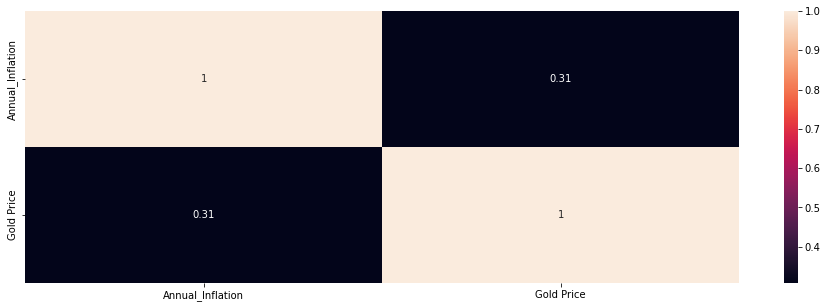

In [84]:
plt.figure(figsize = (16,5))
sns.heatmap(gvi, annot=True)
plt.show()

### Analysis

We can see from our gold line graph that the gold price rose sharply at the beginning of the 1970's, from around  in 1970 to $\$$160 in 1975. From 1977 to 1980 we see an almost vertical line from $\$$147 to a high of $\$$614. Going into the 1980's saw a considerable drop, however never returning to it's recent low. Higher gold prices stabilized in the next decade and we have seen still further rises since.

The correlation between gold and inflation on matching years shows a negative correlation of -0.47 which is, all things considered, quite high. For just the period of 1969 to 1980, the correlation is 0.31,a  positive correlation that is lower than expected but not negligible. This would suggest that as inflation rose in the 1970's so too did the price of gold, although not in tandem.

It is hard to know what to make of this data as it is not definitive and naturally changes as the period of time we are measuring for changes.

Wage

In [ ]:
# From 1967 to 1979, the data was manually imported from the archived documents in ABS
date = [
    '1967-Q1',
    '1967-Q2', 
    '1967-Q3', 
    '1967-Q4',
    '1968-Q1',
    '1968-Q2',
    '1968-Q3',
    '1968-Q4',
    '1969-Q1',
    '1969-Q2',
    '1969-Q3',
    '1969-Q4',
    '1970-Q1',
    '1970-Q2',
    '1970-Q3',
    '1970-Q4',
    '1971-Q1',
    '1971-Q2',
    '1971-Q3',
    '1971-Q4',
    '1972-Q1',
    '1972-Q2',
    '1972-Q3',
    '1972-Q4',
    '1973-Q1',
    '1973-Q2',
    '1973-Q3',
    '1973-Q4',
    '1974-Q1',
    '1974-Q2',
    '1974-Q3',
    '1974-Q4',
    '1975-Q1',
    '1975-Q2',
    '1975-Q3',
    '1975-Q4',
    '1976-Q1',
    '1976-Q2',
    '1976-Q3',
    '1976-Q4',
    '1977-Q1',
    '1977-Q2',
    '1977-Q3',
    '1977-Q4',
    '1978-Q1',
    '1978-Q2',
    '1978-Q3',
    '1978-Q4',
]

value = [
    62.00,
    63.2,
    64.3,
    64.9,
    65.4,
    66.8,
    67.7,
    69.8,
    71.6,
    72.2,
    73.6,
    75.1,
    77,
    78.8,
    80,
    82,
    87,
    88.3,
    90,
    91.8,
    93.4,
    95.2,
    97.9,
    100.10,
    102,
    106.3,
    111.9,
    115,
    118.8,
    127.7,
    140,
    148,
    151,
    155.3,
    159.1,
    167.5,
    170.7,
    179,
    184.7,
    187.4,
    192,
    198,
    204.5,
    205.2,
    213,
    215.6,
    220.6,
    221,
]

In [ ]:
# Create a dataframe to store the data
df = pd.DataFrame()
df['Time'] = date
df['Weekly Wgae'] = value
df.set_index(['Time'], inplace = True)

# Visualise the data
wage_plot = df.hvplot(rot = 90)
wage_plot

In [ ]:
# From
import pandas as pd
import requests

response_data = requests.get('https://api.data.abs.gov.au/data/ABS,WPI,1.0.0/1.THRPEB.7.TOT.10.AUS.Q?startPeriod=1997-Q3&endPeriod=2022-Q1&detail=dataonly&format=jsondata')
response_content = response_data.content

In [ ]:
# Change the data format to json
import json
data = response_data.json()

In [ ]:
# Enter the final layer in the ABS api
data_1 = pd.DataFrame(data)
pd.DataFrame(data_1["data"])

data_3 = data_1["data"]['structure']
data_4 = data_3['dimensions']['observation'][0]['values']

# Create an empty list for wpi timeline
wpi_name = []

# Loop the wpi timeline into a list
for i in data_4:
    ls = i['id']
    wpi_name.append(ls)

data_2 = data_1["data"]['dataSets']
data_final = data_2[0]['series']['0:0:0:0:0:0:0']['observations']

# Reverse the rows and columns to be plotted
df_1 = pd.DataFrame(data_final).T
df_1.columns = ['WPI']

# Modify the data structure
df_1['Time'] = wpi_name
df1 = df_1.set_index(['Time'])

# Plot the data
df_plot = df1.plot(kind = 'line')
df_plot